<a href="https://colab.research.google.com/github/moqri/STEMREM200/blob/main/ESC_vs_iPSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import required packages
import pandas as pd
import numpy as np

In [2]:
#URL adress of RNA-seq data file
rna_seq_file='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE73nnn/GSE73211/suppl/GSE73211_isogenic.TPM.txt.gz'

In [3]:
#read the file
tpm=pd.read_table(rna_seq_file)

In [4]:
# show the top 5 rows
tpm.head(5)

,symbol,hESC SC2-1,hESC SC2-2,hESC SC2-3,hESC SC3-1,hESC SC3-2,hESC SC3-3,hESC GFP12,hESC GFP13,hESC GFP5,hESC GFP2,hESC GFP3,hESC GFP15,hiPSC1,hiPSC2,hiPSC3,hiPSC8,hiPSC9,hiPSC11,hESC SC2-6 Fibroblast,hESC SC3-6 Fibroblast,hESC GFP5 Fibroblast,hESC GFP12 Fibroblast,hESC GFP13 Fibroblast,hESC GFP2 Fibroblast,hESC GFP3 Fibroblast,hESC GFP15Fibroblast,hiPSC1 Fibroblast,hiPSC2 Fibroblast,hiPSC3 Fibroblast,hiPSC8 Fibroblast,hiPSC9 Fibroblast,hiPSC11 Fibroblast,Human_Dermal_Fibroblast
RP11-560A15.3,RP11-560A15.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.096714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CREB3L1,CREB3L1,11.098906,11.439167,12.447480,6.886064,5.653596,6.754446,11.012172,7.621126,11.815619,5.705730,6.752222,6.313430,8.918602,7.025237,7.302625,4.775793,5.126329,7.543497,157.914551,141.662122,146.480745,154.934558,156.101432,166.712614,75.783944,186.238609,184.953022,163.270489,165.383381,167.468506,154.316037,173.675876,193.024389
RPS11,RPS11,3385.358989,3250.811157,3301.984295,2840.934509,2839.811164,2845.844446,3293.581132,3128.847523,3421.976296,3164.825934,3191.008986,3183.825373,2992.518992,2916.881794,2776.073933,2794.567964,2654.561686,2689.002242,2376.828835,2737.801658,2227.060103,2247.409559,2271.218661,3204.946239,2427.181734,2449.621520,2155.456392,2114.136652,2189.466240,2795.025142,2962.811335,3046.407602,2769.592246
RP11-783L4.1,RP11-783L4.1,0.000000,0.000000,0.280735,0.000000,0.000000,0.000000,0.000000,0.000000,0.192976,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166557,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PNMA1,PNMA1,33.511536,35.089531,34.163900,34.900165,29.989708,27.379224,39.504944,37.978849,42.192685,35.687738,38.812193,35.485875,41.785477,41.022740,43.549380,34.423147,36.400383,40.357450,42.440364,47.955205,39.200304,41.035460,36.300716,32.742141,69.642335,50.944324,35.721668,44.414922,37.550163,42.315535,48.492435,47.892198,34.528598


In [5]:
#limit the data to one ESC and one iPSC sample
esc='hESC SC2-1'
ipsc='hiPSC1'
tpm2=tpm[[esc,ipsc]]
tpm2.head(5)

,hESC SC2-1,hiPSC1
RP11-560A15.3,0.000000,0.096714
CREB3L1,11.098906,8.918602
RPS11,3385.358989,2992.518992
RP11-783L4.1,0.000000,0.000000
PNMA1,33.511536,41.785477


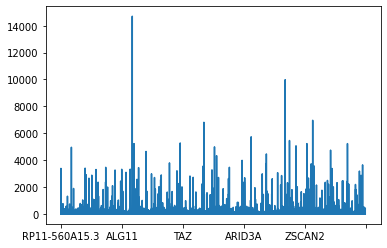

In [6]:
#plot the ESC transcript frequencies (TPM)
tpm2[esc].plot()

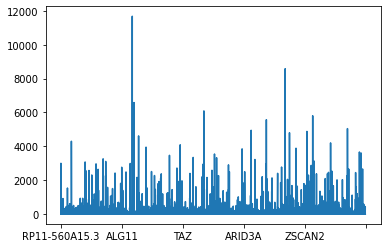

In [7]:
#plot the iPSC transcript frequencies (TPM)
tpm2[ipsc].plot()

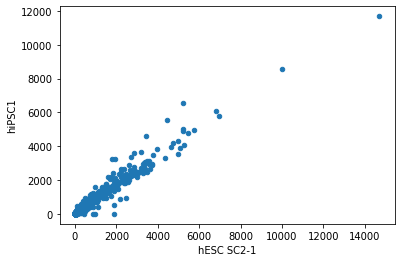

In [8]:
#Compare ESC and iPSC using scatter plot
tpm2.plot.scatter(esc,ipsc)

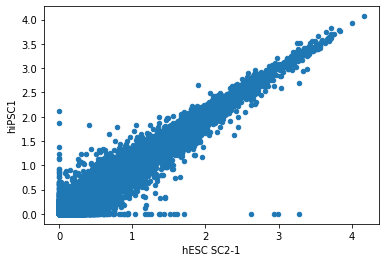

In [9]:
#Log transform TPM data
tpm3=np.log10(tpm2+1)
tpm3.plot.scatter(esc,ipsc)

In [10]:
#show the most abondant transcripts 
tpm3.sort_values(esc).tail(10)

,hESC SC2-1,hiPSC1
RP5-857K21.10,3.718534,3.818405
RPL41,3.718539,3.688167
NPM1,3.718611,3.702695
RPL39,3.722462,3.611232
RPS27,3.737267,3.681179
TMSB4X,3.758671,3.694026
GAPDH,3.833517,3.784538
RPS24,3.842941,3.763581
RP5-857K21.6,3.999337,3.933613
EEF1A1,4.167475,4.067571


In [11]:
#select RPs
RPs=tpm3.index.str.startswith('RP')
RPs

array([ True, False,  True, ..., False, False,  True])

In [12]:
#remove RPs
tpm4=tpm3[~RPs]
tpm4.sort_values(esc).tail(10)

,hESC SC2-1,hiPSC1
ACTB,3.434951,3.523705
ENO1,3.486935,3.380302
PPIA,3.503430,3.563599
GNB2L1,3.519038,3.470965
TPT1,3.571169,3.457785
HNRNPA1,3.600578,3.584859
NPM1,3.718611,3.702695
TMSB4X,3.758671,3.694026
GAPDH,3.833517,3.784538
EEF1A1,4.167475,4.067571


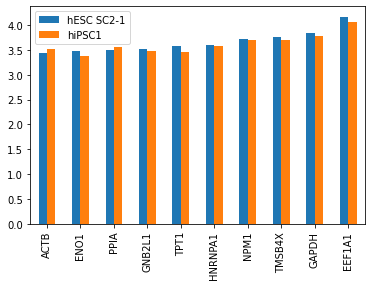

In [13]:
#Plot the most frequent transcripts
tpm4.sort_values(esc).tail(10).plot(kind='bar')